In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from multiprocessing import cpu_count
from multiprocessing import Pool

In [2]:
mc_page1 = requests.get("https://www.moneycontrol.com/news/business/companies/")

b'<!DOCTYPE html><html lang="en"><head><meta name="next-head-count" content="2"/><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=5.0" /><meta http-equiv="x-ua-compatible" content="ie=edge"><meta name="robots" content="max-image-preview:large"/>   <meta charset="utf-8"><title>Company Business News: Latest Indian Companies News, Company Quarterly Results News  - Moneycontrol.com</title><meta name="description" content="Company News: Get the latest companies news, company quarterly results, policies, analysis, corporate news, company earnings news, information and more on moneycontrol ." /><meta name="news_keywords" content="Companies  News, Companies  News, Latest Companies  News, Indian Companies News " /><meta name="Keywords" content="Companies  News, Companies  News, Latest Companies  News, Indian Companies News "><meta content="NOODP" name="robots"><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta http-equiv="Last-Modified"
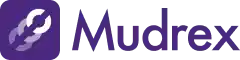
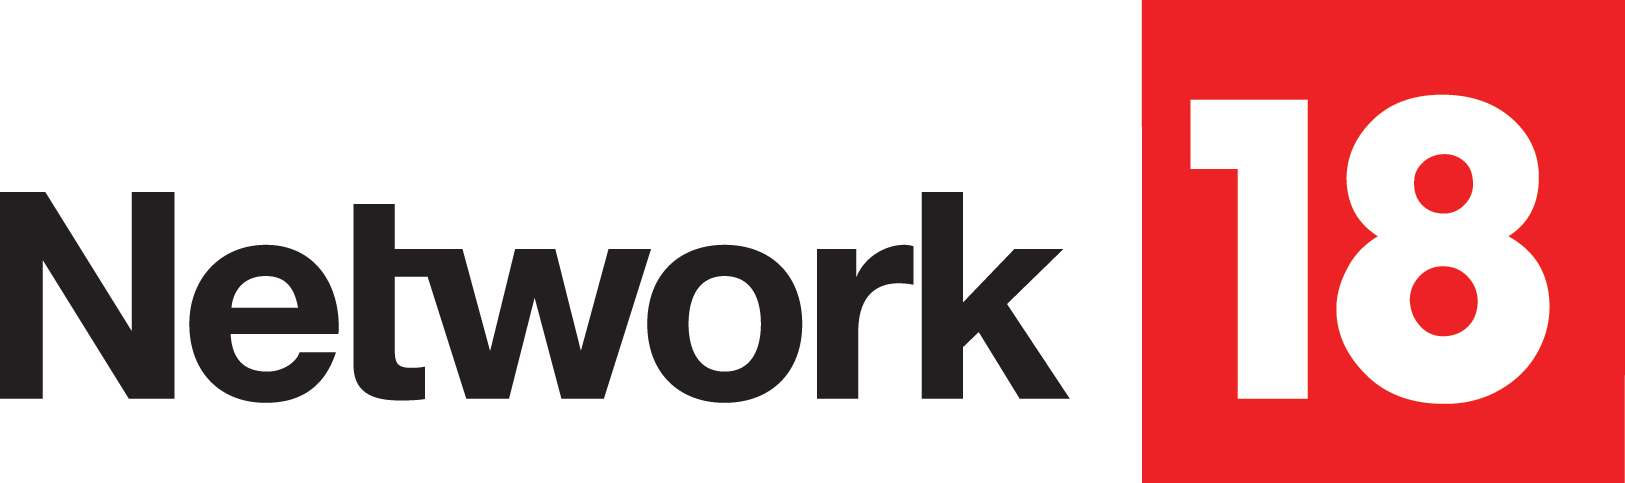

In [3]:
mc_page1.content

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="2" name="next-head-count"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta charset="utf-8"/>
  <title>
   Company Business News: Latest Indian Companies News, Company Quarterly Results News  - Moneycontrol.com
  </title>
  <meta content="Company News: Get the latest companies news, company quarterly results, policies, analysis, corporate news, company earnings news, information and more on moneycontrol ." name="description"/>
  <meta content="Companies  News, Companies  News, Latest Companies  News, Indian Companies News " name="news_keywords"/>
  <meta content="Companies  News, Companies  News, Latest Companies  News, Indian Companies News " name="Keywords"/>
  <meta content="NOODP" name="robots"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-T
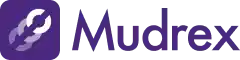
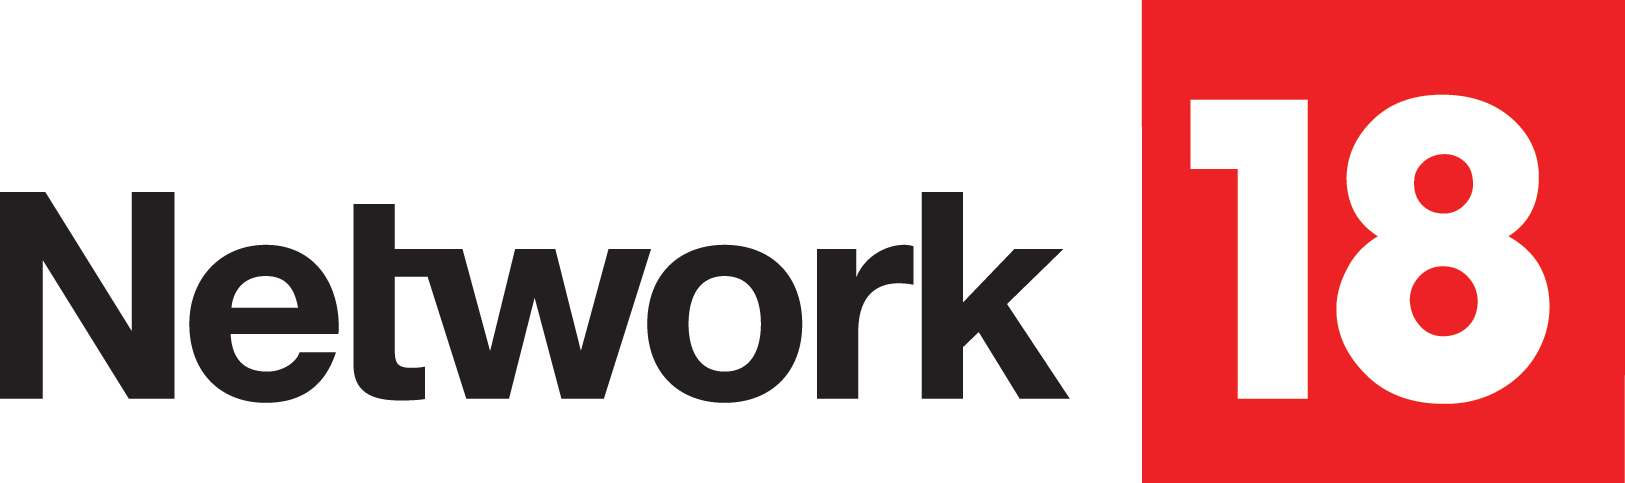

In [4]:
soup = BeautifulSoup(mc_page1.text, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

In [5]:
pages = soup.select('h2 > a')
pages

[<a href="https://www.moneycontrol.com/news/business/markets/intellect-design-shares-up-10-on-strong-volumes-after-launching-purple-fabric-ai-system-12895733.html" title="Intellect Design shares up 10% on strong volumes after launching 'Purple Fabric' AI system">Intellect Design shares up 10% on strong volumes after launching 'Purple Fabric' AI system</a>,
 <a href="https://www.moneycontrol.com/news/business/companies/novo-nordisk-falls-most-on-record-after-new-weight-drug-disappoints-12894915.html" title="Novo Nordisk falls most on record after new weight drug disappoints">Novo Nordisk falls most on record after new weight drug disappoints</a>,
 <a href="https://www.moneycontrol.com/news/business/companies/centre-must-push-states-to-comply-with-renewable-purchase-obligations-says-industry-12894900.html" title="Centre must push states to comply with renewable purchase obligations, says industry">Centre must push states to comply with renewable purchase obligations, says industry</a>,
 

In [6]:
pages = []
pages1_10 = soup.select('div.pagenation>a:not(:has(span))')
# print(pages1_10)
for page in pages1_10:
    page = page.get('href', 'No Link')
    pages.append(page)
mc_page2 = requests.get('https://www.moneycontrol.com/news/business/companies/page-16/')
soup2 = BeautifulSoup(mc_page2.content, 'html5lib')
pages11_21 = soup2.select('div.pagenation>a:not(:has(span))')
for page in pages11_21:
    page = page.get('href', 'No Link')
    pages.append(page)
mc_page3 = requests.get('https://www.moneycontrol.com/news/business/companies/page-27/')
soup3 = BeautifulSoup(mc_page3.content, 'html5lib')
pages22_end = soup3.select('div.pagenation>a:not(:has(span))')
for page in pages22_end:
    page = page.get('href', 'No Link')
    pages.append(page)
print(pages)

['https://www.moneycontrol.com/news/business/companies/', 'https://www.moneycontrol.com/news/business/companies/page-2/', 'https://www.moneycontrol.com/news/business/companies/page-3/', 'https://www.moneycontrol.com/news/business/companies/page-4/', 'https://www.moneycontrol.com/news/business/companies/page-5/', 'https://www.moneycontrol.com/news/business/companies/page-6/', 'https://www.moneycontrol.com/news/business/companies/page-7/', 'https://www.moneycontrol.com/news/business/companies/page-8/', 'https://www.moneycontrol.com/news/business/companies/page-9/', 'https://www.moneycontrol.com/news/business/companies/page-10/', 'https://www.moneycontrol.com/news/business/companies/page-11/', 'https://www.moneycontrol.com/news/business/companies/page-12/', 'https://www.moneycontrol.com/news/business/companies/page-13/', 'https://www.moneycontrol.com/news/business/companies/page-14/', 'https://www.moneycontrol.com/news/business/companies/page-15/', 'https://www.moneycontrol.com/news/busin

In [10]:
description_pages = []
for page in pages:
    description_page = requests.get(page)
    soup_page = BeautifulSoup(description_page.content, 'html5lib')
    soup_page.prettify()
    page_titles_links = soup_page.select('h2>a')
    description_pages.extend(page_titles_links)
description_pages

[<a href="https://www.moneycontrol.com/news/business/moneycontrol-research/why-india-shelter-stands-out-in-the-over-crowded-low-cost-housing-finance-space-12895071.html" title="Why India Shelter stands out in the over-crowded low-cost housing finance space?">Why India Shelter stands out in the over-crowded low-cost housing finance space?</a>,
 <a href="https://www.moneycontrol.com/news/business/markets/intellect-design-shares-up-10-on-strong-volumes-after-launching-purple-fabric-ai-system-12895733.html" title="Intellect Design shares up 10% on strong volumes after launching 'Purple Fabric' AI system">Intellect Design shares up 10% on strong volumes after launching 'Purple Fabric' AI system</a>,
 <a href="https://www.moneycontrol.com/news/business/companies/novo-nordisk-falls-most-on-record-after-new-weight-drug-disappoints-12894915.html" title="Novo Nordisk falls most on record after new weight drug disappoints">Novo Nordisk falls most on record after new weight drug disappoints</a>,
 

In [ ]:

# i=1
# title = []
# abstract = []
# content = []
# for line in description_pages:
#     # title = line.get('title', 'No Title')
#     # print("Title:\n", title)
#     link = line.get('href', 'No Description')
#     description_page = requests.get(link)
#     description = BeautifulSoup(description_page.content, 'html5lib')
#     # print(i)
#     i += 1
#     description_head = description.select('h1.article_title')
#     if len(description_head) == 1:
#         description_head = description.select('h1.article_title')[0].get_text(strip=True)
#     # print("Title:\n", description_head)
#     title.append(description_head)
#     description_abstract = description.select('h2.article_desc')
#     if len(description_abstract) == 1:
#         description_abstract = description.select('h2.article_desc')[0].get_text(strip=True)
#     # print("Abstract:\n", description_abstract)
#     abstract.append(description_abstract)
#     description_content = description.select('div#contentdata>p')
#     content_str = ""
#     for p in description_content:
#         # print(p.get_text(strip=True))
#         content_str += p.get_text(strip=True) + "\n"
#     content.append(content_str)

KeyboardInterrupt: 

In [16]:

# i=1
# title = []
# abstract = []
# content = []
def scrap(line):
# for line in description_pages:

    # title = line.get('title', 'No Title')
    # print("Title:\n", title)
    link = line.get('href', 'No Description')
    description_page = requests.get(link)
    description = BeautifulSoup(description_page.content, 'html5lib')
    # print(i)
    # i += 1
    description_head = description.select('h1.article_title')
    if len(description_head) == 1:
        description_head = description.select('h1.article_title')[0].get_text(strip=True)
    # print("Title:\n", description_head)
    # title.append(description_head)
    description_abstract = description.select('h2.article_desc')
    if len(description_abstract) == 1:
        description_abstract = description.select('h2.article_desc')[0].get_text(strip=True)
    # print("Abstract:\n", description_abstract)
    # abstract.append(description_abstract)
    description_content = description.select('div#contentdata>p')
    content_str = ""
    for p in description_content:
        # print(p.get_text(strip=True))
        content_str += p.get_text(strip=True) + " "
    # content.append(content_str)
    return description_head, description_abstract, content_str

# print(title)
# print(abstract)
# print(content)

with Pool(cpu_count()) as p:
    results = p.map(scrap, description_pages)

In [31]:
df = pd.DataFrame(results, columns=['Title', 'Abstract', 'Content'])
df = df.replace('', np.nan)
df = df.dropna()
df.to_csv('/mnt/c/Users/ankku/Downloads/moneycontrol.csv', index = False)